# Creating figure 4
This notebook generates figure 4 in the paper, assuming that the  datafiles have been created (by the scripts in the 'simulations'-folder). The figures were put together in inkscape.

In [120]:
import sys

import h5py
from fenics import *
from analysistools import *
plt.rc('text', usetex=True)

font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)

%matplotlib notebook
import logging
ffc_logger = logging.getLogger('FFC')
ffc_logger.setLevel(logging.WARNING)
import scipy.io

In [121]:
a = AnalysisTools('fig_3-7_data/knp_long.h5')
cell_morphology = scipy.io.loadmat('fig_3-7_data/cell_morphology.mat')
neuron_data = h5py.File('fig_3-7_data/neuron_data.hdf5','r')

IOError: unable to open file (File accessibilty: Unable to open file)

In [122]:
xmin = a.mesh.coordinates()[:,0].min()
xmax = a.mesh.coordinates()[:,0].max()
xlen = xmax - xmin

ymin = a.mesh.coordinates()[:,1].min()
ymax = a.mesh.coordinates()[:,1].max()
ylen = ymax - ymin

zmin = a.mesh.coordinates()[:,2].min()
zmax = a.mesh.coordinates()[:,2].max()
zmid = (zmax + zmin)/2

N = 100
padding = 0.01


In [123]:
x_array = np.linspace(xmin + padding*xlen, xmax - padding*xlen, N)
y_array = np.linspace(ymin + padding*ylen, ymax - padding*ylen, N)
X,Y = np.meshgrid (x_array,y_array)

X=X*1e6
Y = Y*1e6

measurement_point = [20,20,20]

In [124]:
def plot_func_with_neuron(t_idx, ion_idx, levels, c_init, cticks, title='', cmap='RdBu', clabel='', factor=1.):
    Z = np.zeros([100, 100])

    k = t_idx
    u = Function(a.W)
    c = Function(a.V)
    a.hdf.read(u, '/solution/vector_'+str(k))
    c.assign(project(u.sub(ion_idx), a.V))
    for i,x in enumerate(x_array):
        for j,y in enumerate(y_array):
            p = Point(x,y,zmid)
            Z[j,i] = c(p)
    
    
    Z = Z*factor
    Z = Z-c_init
    plt.figure()
    # print(X.shape, Y.shape, Z[:,:].shape)
#     levels = np.linspace(vmin-c_init, vmax-c_init, 9)
    plt.contourf(X,Y,Z, cmap=cmap, levels=levels)
    
#     if vmax > vmin:
#         plt.pcolormesh(X,Y,Z, cmap=cmap, vmin=vmin, vmax=vmax)
#     else:
#         plt.pcolormesh(X,Y,Z, cmap=cmap)
    # plt.axis('image')
#     if ion_idx==2:
#         cbar = plt.colorbar(ticks=[-0.01, -0.005, 0, 0.005, 0.01])
#     elif ion_idx==1:
#         cbar = plt.colorbar(ticks=[-0.03, -0.02, -0.01])
#     else:
    cbar = plt.colorbar(ticks=cticks)
        
    
    xstart = (cell_morphology['xstart'][0])
    xend = (cell_morphology['xend'][0])

    ystart = (cell_morphology['ystart'][0])
    yend = (cell_morphology['yend'][0])

    NN = cell_morphology['N'][0][0]

    [plt.plot([xstart[idx], xend[idx]], [ystart[idx], yend[idx]], c='k', linewidth=0.4, zorder=1) for idx in range(NN)]    
    plt.axis("image")
    plt.title(title)
    plt.scatter([measurement_point[0]], [measurement_point[1]], c='lightgreen', edgecolor='k', zorder=2)

    plt.scatter([-100], [1100], c='magenta', edgecolor='k', zorder=2)
    
    cbar.set_label(clabel)
    plt.xlabel(r'$x$-position ($\mu$m)')
    plt.ylabel(r'$y$-position ($\mu$m)')
    
    return Z


<IPython.core.display.Javascript object>


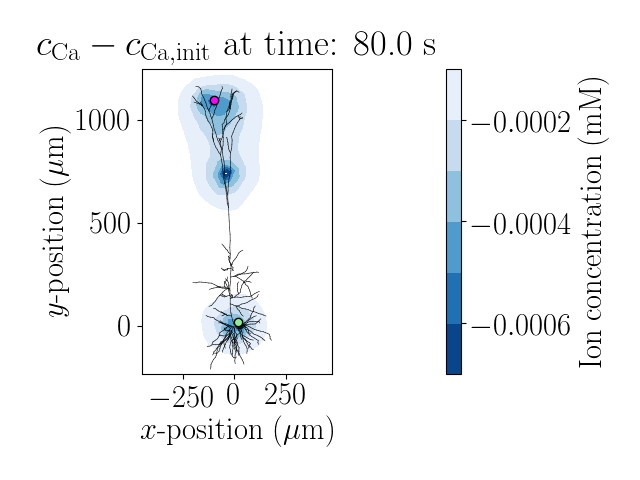

<IPython.core.display.Javascript object>


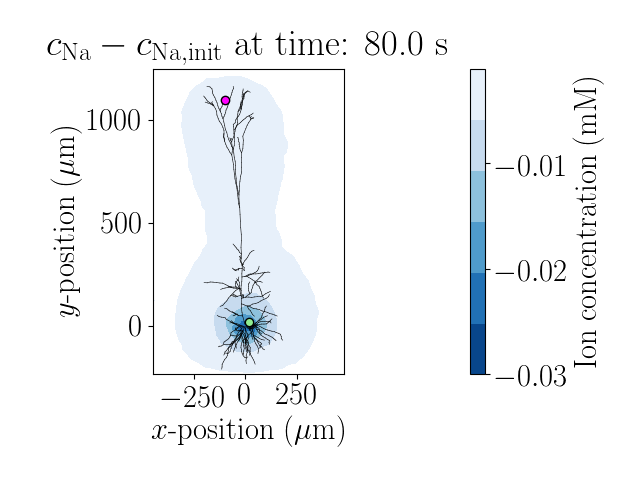

<IPython.core.display.Javascript object>


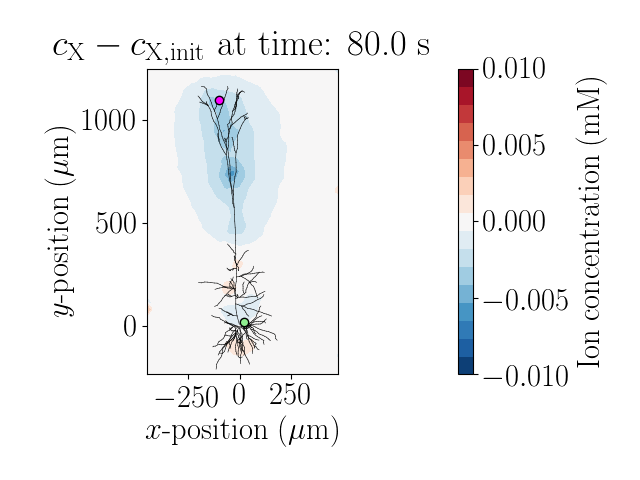

<IPython.core.display.Javascript object>


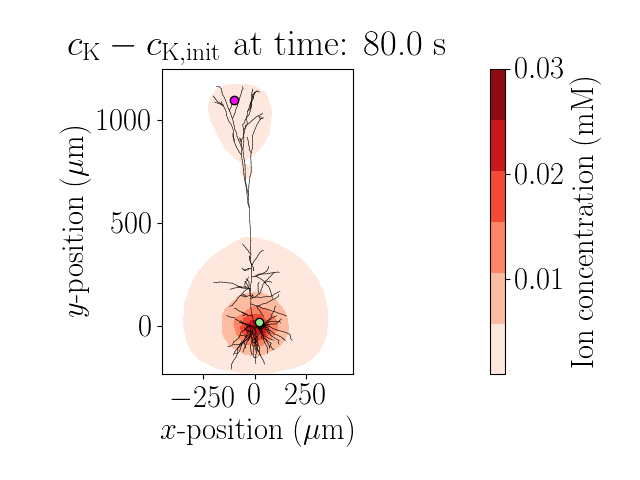

In [125]:
t_idx = 800

title_ca = r'$c_\mathrm{Ca}-c_\mathrm{Ca,init}$  at time: ' + str(a.time_series[t_idx]) + ' s'
c_init = 1.4
vmin = -0.0007
vmax = -0.0001
levels = np.linspace(vmin,vmax, 7)
cticks = [-0.0008, -0.0006, -0.0004, -0.0002, 0]
plot_func_with_neuron(t_idx, 0, levels, c_init, cticks, title=title_ca, cmap='Blues_r', clabel='Ion concentration (mM)')
plt.tight_layout()
plt.savefig('ca.pdf')

title_na = r'$c_\mathrm{Na}-c_\mathrm{Na,init}$ at time: ' + str(a.time_series[t_idx]) + ' s'
c_init = 150
vmin = -0.03
vmax = -0.001
levels = np.linspace(vmin,vmax, 7)
cticks = [-0.03, -0.02, -0.01, 0]
plot_func_with_neuron(t_idx, 1, levels, c_init, cticks, title=title_na, cmap='Blues_r', clabel='Ion concentration (mM)')
plt.tight_layout()
plt.savefig('na.pdf')

title_x = r'$c_\mathrm{X}-c_\mathrm{X,init}$ at time: ' + str(a.time_series[t_idx]) + ' s'
c_init = 155.8
vmin = -0.01
vmax = 0.01
levels = np.linspace(vmin,vmax, 18)
cticks = [-0.01, -0.005, 0, 0.005, 0.01]
plot_func_with_neuron(t_idx, 2, levels, c_init, cticks, title=title_x, cmap='RdBu_r', clabel='Ion concentration (mM)')
plt.tight_layout()
plt.savefig('X.pdf')

title_k = r'$c_\mathrm{K}-c_\mathrm{K,init}$ at time: ' + str(a.time_series[t_idx]) + ' s'
c_init = 3
vmin = 0.001
vmax = 0.03
levels = np.linspace(vmin,vmax, 7)
cticks = [0, 0.01, 0.02, 0.03]
plot_func_with_neuron(t_idx, 3, levels, c_init, cticks, title=title_k, cmap='Reds', clabel='Ion concentration (mM)')
plt.tight_layout()
plt.savefig('k.pdf')

plt.show()